In [1]:
# dades de: adolescent-2160-0-Dexcom-Cozmo-Basal

In [1]:
import pandas as pd

def read_train_test(path, patient_id):
    train = pd.read_csv(path + 'adolescent#00' + patient_id + '-train.csv')
    test = pd.read_csv(path + 'adolescent#00' + patient_id + '-test.csv')
    return train, test

path = '../data/raw/simglucose/'
patient_id = '1'
train_df, test_df = read_train_test(path, patient_id)
train_df['Time'] = pd.to_datetime(train_df['Time'])
test_df['Time'] = pd.to_datetime(test_df['Time'])

freq = train_df['Time'].diff().value_counts()
m = freq.index[0].seconds / 60
print(f'Frequency: {m} minutes')

Frequency: 3.0 minutes


In [2]:
train_df['Time'] = pd.to_datetime(train_df['Time'])  # Convertir 'Time' a datetime
train_df.set_index('Time', inplace=True)  # Establir 'Time' com a índex

# Agrupar per mitja hora
half_hourly_data = train_df.resample('60T').mean()  # '30T' indica 30 minuts

# Mostrar les dades agrupades
print(half_hourly_data)

                             BG         CGM  CHO   insulin  LBGI       HBGI  \
Time                                                                          
2019-05-01 00:00:00  149.020011  139.621926  0.0  0.013933   0.0   2.755277   
2019-05-01 01:00:00  149.020366  142.609568  0.0  0.013933   0.0   2.755324   
2019-05-01 02:00:00  149.021754  149.517287  0.0  0.013933   0.0   2.755507   
2019-05-01 03:00:00  149.024030  166.096871  0.0  0.013933   0.0   2.755808   
2019-05-01 04:00:00  149.026563  153.512747  0.0  0.013933   0.0   2.756142   
...                         ...         ...  ...       ...   ...        ...   
2019-07-15 19:00:00  130.186227  122.603944  1.4  0.052822   0.0   0.758348   
2019-07-15 20:00:00  165.031350  161.164613  0.0  0.013933   0.0   5.297285   
2019-07-15 21:00:00  192.444889  194.470514  0.0  0.013933   0.0  10.098181   
2019-07-15 22:00:00  181.034648  171.864289  0.0  0.013933   0.0   7.941211   
2019-07-15 23:00:00  159.858921  174.937057  0.0  0.

/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_5455/2602273474.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  half_hourly_data = train_df.resample('60T').mean()  # '30T' indica 30 minuts


In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df['CGM'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.692239
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


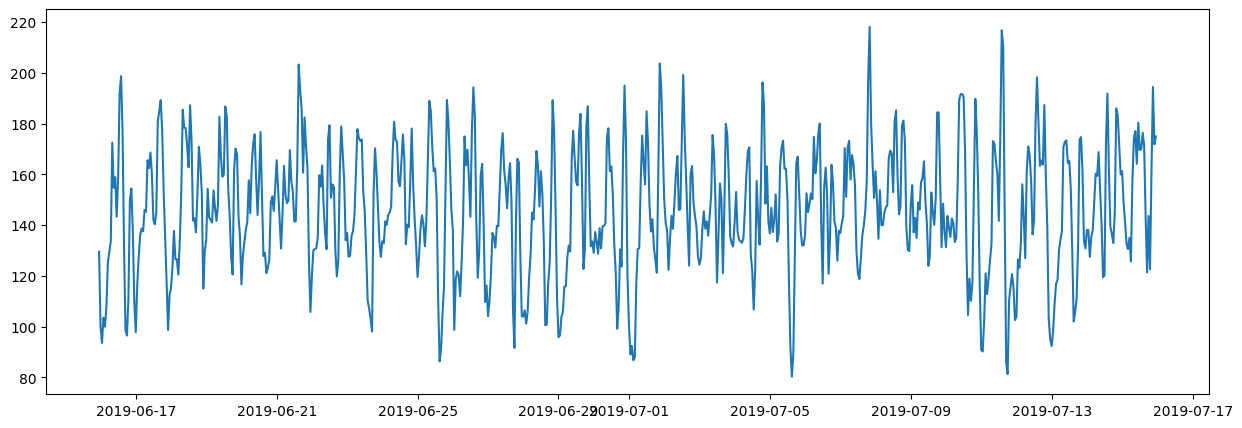

In [4]:

half_hourly_data['Time'] = half_hourly_data.index
last_30_days = half_hourly_data[half_hourly_data['Time'] >= (half_hourly_data['Time'].max() - pd.Timedelta(days=30))]
last_2_days = half_hourly_data[half_hourly_data['Time'] <= (half_hourly_data['Time'].min() + pd.Timedelta(days=2))]

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(last_30_days['Time'], last_30_days['CGM'])
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
model = auto_arima(last_30_days['CGM'], seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, m=48, exog=last_30_days['CHO'])
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[48] intercept   : AIC=5948.341, Time=9.91 sec
 ARIMA(0,0,0)(0,0,0)[48] intercept   : AIC=6655.686, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[48] intercept   : AIC=6070.790, Time=5.59 sec
 ARIMA(0,0,1)(0,0,1)[48] intercept   : AIC=6110.394, Time=2.33 sec
 ARIMA(0,0,0)(0,0,0)[48]             : AIC=9253.775, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[48] intercept   : AIC=5941.175, Time=3.85 sec
 ARIMA(2,0,2)(0,0,0)[48] intercept   : AIC=5958.588, Time=0.40 sec
 ARIMA(2,0,2)(0,0,2)[48] intercept   : AIC=5942.998, Time=43.20 sec
 ARIMA(2,0,2)(1,0,0)[48] intercept   : AIC=5955.789, Time=20.79 sec
 ARIMA(2,0,2)(1,0,2)[48] intercept   : AIC=5958.884, Time=70.64 sec
 ARIMA(1,0,2)(0,0,1)[48] intercept   : AIC=5941.847, Time=5.09 sec
 ARIMA(2,0,1)(0,0,1)[48] intercept   : AIC=5939.239, Time=7.44 sec
 ARIMA(2,0,1)(0,0,0)[48] intercept   : AIC=5957.264, Time=0.27 sec
 ARIMA(2,0,1)(1,0,1)[48] intercept   : AIC=5940.754, Time=10.58 sec
 ARIMA(2,0,1)(0

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85771D+00    |proj g|=  2.83507D-01


 This problem is unconstrained.



At iterate    5    f=  3.80842D+00    |proj g|=  2.31801D-02

At iterate   10    f=  3.80482D+00    |proj g|=  1.87829D-03

At iterate   15    f=  3.80477D+00    |proj g|=  5.91020D-03

At iterate   20    f=  3.80470D+00    |proj g|=  1.04093D-03

At iterate   25    f=  3.80449D+00    |proj g|=  1.35406D-02

At iterate   30    f=  3.80269D+00    |proj g|=  2.37278D-02

At iterate   35    f=  3.80197D+00    |proj g|=  2.23531D-03

At iterate   40    f=  3.80196D+00    |proj g|=  1.26467D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     43      1     0     0   1.265D-05   3.802D+00
  F =   3.80196262138

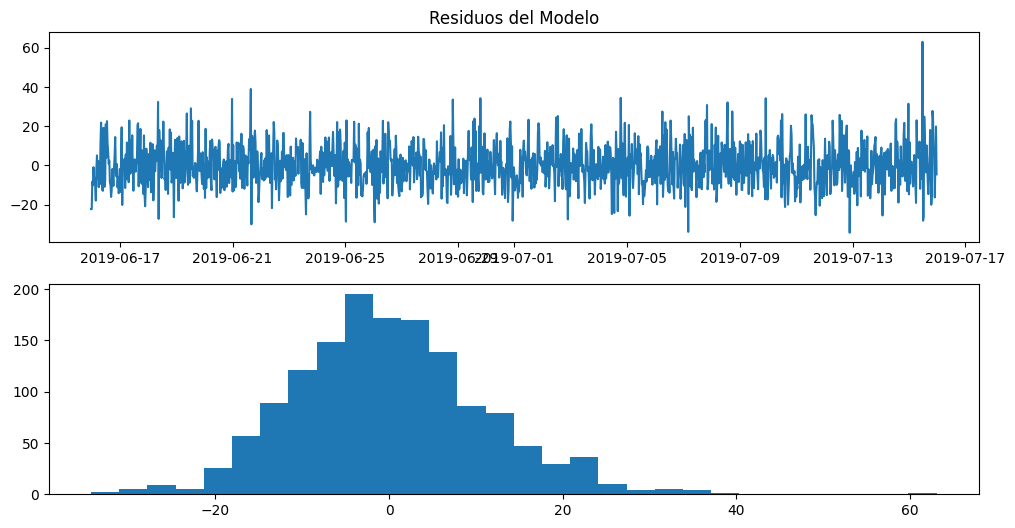

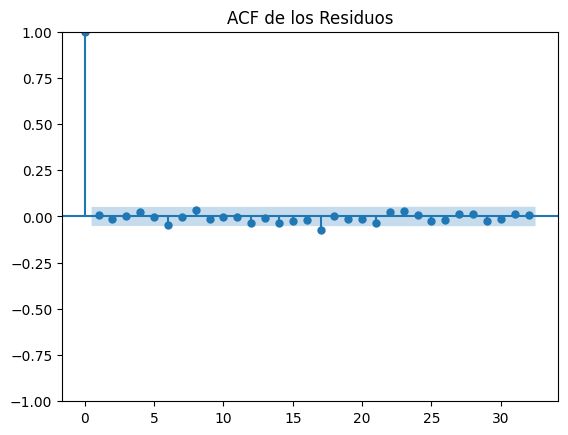

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = SARIMAX(last_30_days['CGM'],
                                    order=(2, 0, 1),
                                    seasonal_order=(0, 0, 2, 48),
                                    trend='c')
results = model.fit()

residuals = results.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuos del Modelo')
plt.subplot(212)
plt.hist(residuals, bins=30)
plt.show()

plot_acf(residuals)
plt.title('ACF de los Residuos')
plt.show()

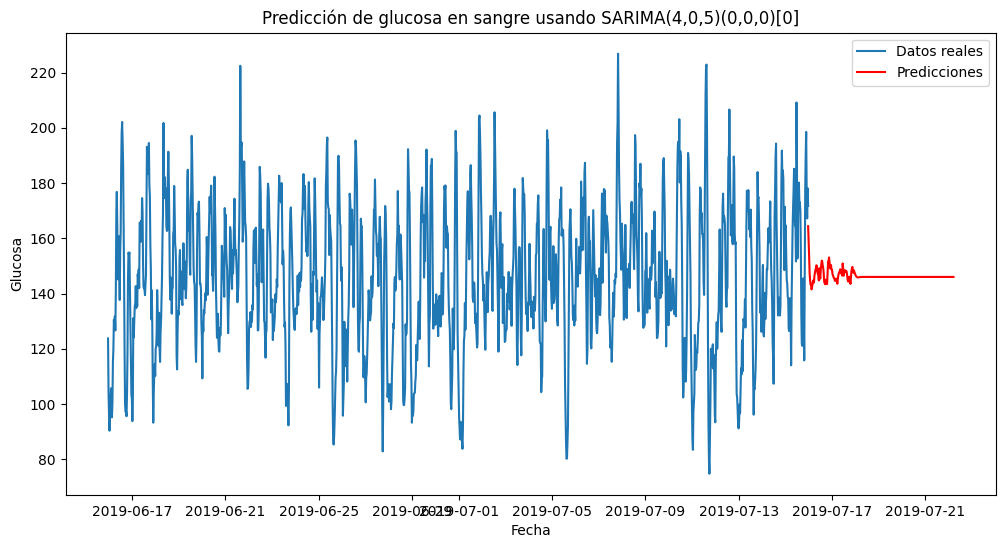

In [32]:
forecast = results.get_forecast(steps=300)
forecast_df = pd.DataFrame(forecast.predicted_mean.values, columns=['Predicción'])
forecast_index = pd.date_range(start=last_30_days.index[-1], periods=300, freq='30min')
forecast_df.set_index(forecast_index, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(last_30_days['CGM'], label='Datos reales')
plt.plot(forecast_df, label='Predicciones', color='red')
plt.title('Predicción de glucosa en sangre usando SARIMA(4,0,5)(0,0,0)[0]')
plt.xlabel('Fecha')
plt.ylabel('Glucosa')
plt.legend()
plt.show()



In [33]:
last_30_days

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,Time
Time,,,,,,,,
2019-06-15 23:30:00,114.463982,123.724392,0.0,0.013933,0.004595,0.037231,0.041826,2019-06-15 23:30:00
2019-06-16 00:00:00,104.969606,104.178910,0.0,0.013933,0.180479,0.000000,0.180479,2019-06-16 00:00:00
2019-06-16 00:30:00,100.272966,95.914738,0.0,0.013933,0.462366,0.000000,0.462366,2019-06-16 00:30:00
2019-06-16 01:00:00,99.159340,90.322838,0.0,0.013933,0.553501,0.000000,0.553501,2019-06-16 01:00:00
2019-06-16 01:30:00,100.304457,96.874452,0.0,0.013933,0.458596,0.000000,0.458596,2019-06-16 01:30:00
...,...,...,...,...,...,...,...,...
2019-07-15 21:30:00,193.210689,198.518386,0.0,0.013933,0.000000,10.247741,10.247741,2019-07-15 21:30:00
2019-07-15 22:00:00,186.328539,176.533675,0.0,0.013933,0.000000,8.916982,8.916982,2019-07-15 22:00:00
2019-07-15 22:30:00,175.740757,167.194903,0.0,0.013933,0.000000,6.965441,6.965441,2019-07-15 22:30:00
